# Part 1: Preprocessing the Data

In [ ]:
#importing libraries

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import mlxtend
import matplotlib.pyplot as plt

# 1. Load the Dataset

In [ ]:
#There is no header in the file

file_path = 'store_data.csv'
df = pd.read_csv(file_path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning

In [ ]:
#filing missing values.

df.fillna('', inplace=True)

#Converting the DataFrame to a list of lists format for Apriori Algo.

transactions = df.apply(lambda row: [item for item in row if item != ''], axis=1).tolist()

# Part 2: Implementing Apriori Algorithm

In [ ]:
#Encoding transactions for Apriori Algo.

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 1. Frequent Itemset Mining

In [ ]:
#Applying the Apriori algo with min_support 0.0045.

min_support = 0.0045
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

#Displaying the frequent itemsets with their support values.

print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support                                           itemsets
0    0.020397                                          (almonds)
1    0.008932                                (antioxydant juice)
2    0.004666                                        (asparagus)
3    0.033329                                          (avocado)
4    0.004533                                      (babies food)
..        ...                                                ...
837  0.006266       (whole wheat rice, spaghetti, mineral water)
838  0.005066                   (pancakes, spaghetti, olive oil)
839  0.004533        (chocolate, spaghetti, mineral water, eggs)
840  0.004933        (chocolate, spaghetti, mineral water, milk)
841  0.004533  (milk, spaghetti, mineral water, frozen vegeta...

[842 rows x 2 columns]


In [ ]:
#Saving the frequent itemsets to a CSV file.

frequent_itemsets.to_csv('transactions.csv', index=False, header=False)

#2. Association Rule Mining

In [ ]:
#Defining thresholds for confidence and lift.

min_confidence = 0.2
min_lift = 3

#Generating association rules from the frequent itemsets.

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules[rules['lift'] >= min_lift]

#Displaying the top 5 rules sorted by lift and confidence.

top_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False).head(5)
print("Top 5 Association Rules:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 5 Association Rules:
                    antecedents    consequents   support  confidence      lift
46                (light cream)      (chicken)  0.004533    0.290598  4.843951
114                     (pasta)     (escalope)  0.005866    0.372881  4.700812
221                     (pasta)       (shrimp)  0.005066    0.322034  4.506672
218         (whole wheat pasta)    (olive oil)  0.007999    0.271493  4.122410
594  (spaghetti, herb & pepper)  (ground beef)  0.006399    0.393443  4.004360


# Part 3: Analysis and Visualization

#1. Analyze the Frequent Itemsets

In [ ]:
#Displaying the frequent itemsets with thier support values.

print("Frequent Itemsets with Support Values:")
print(frequent_itemsets)

Frequent Itemsets with Support Values:
      support                                           itemsets
0    0.020397                                          (almonds)
1    0.008932                                (antioxydant juice)
2    0.004666                                        (asparagus)
3    0.033329                                          (avocado)
4    0.004533                                      (babies food)
..        ...                                                ...
837  0.006266       (whole wheat rice, spaghetti, mineral water)
838  0.005066                   (pancakes, spaghetti, olive oil)
839  0.004533        (chocolate, spaghetti, mineral water, eggs)
840  0.004933        (chocolate, spaghetti, mineral water, milk)
841  0.004533  (milk, spaghetti, mineral water, frozen vegeta...

[842 rows x 2 columns]


In [ ]:
#Analyzing the top 10 frequent itemsets based on thier support values.

top_frequent_itemsets = frequent_itemsets.nlargest(10, 'support')
print("\nTop 5-10 Frequent Itemsets:")
print(top_frequent_itemsets)


Top 5-10 Frequent Itemsets:
     support             itemsets
64  0.238368      (mineral water)
31  0.179709               (eggs)
90  0.174110          (spaghetti)
37  0.170911       (french fries)
23  0.163845          (chocolate)
48  0.132116          (green tea)
63  0.129583               (milk)
49  0.098254        (ground beef)
43  0.095321  (frozen vegetables)
72  0.095054           (pancakes)


#2.	Visualize the Results

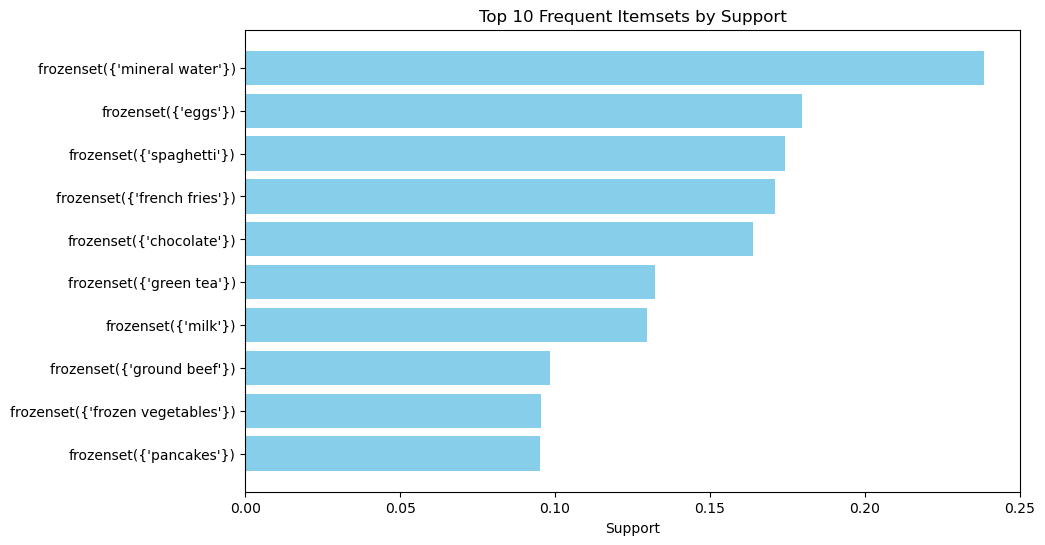

In [ ]:
#Bar chart for the top frequent itemsets based on thier support values.

plt.figure(figsize=(10, 6))
plt.barh(top_frequent_itemsets['itemsets'].astype(str), top_frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.gca().invert_yaxis()
plt.show()

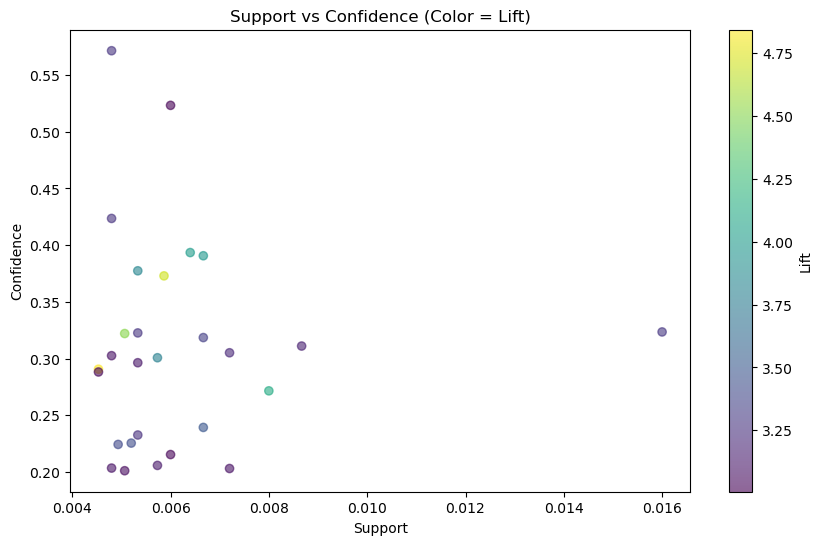

In [ ]:
#Scatter plot to showcase the relationship b/w support, confidence, & lift.

plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Color = Lift)')
plt.show()

#3.	Display Association Rules

In [ ]:
#Displaying the top 5 association rules based on lift and confidence.

top_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False).head(5)
print("Top 5 Association Rules (sorted by Lift and Confidence):")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 5 Association Rules (sorted by Lift and Confidence):
                    antecedents    consequents   support  confidence      lift
46                (light cream)      (chicken)  0.004533    0.290598  4.843951
114                     (pasta)     (escalope)  0.005866    0.372881  4.700812
221                     (pasta)       (shrimp)  0.005066    0.322034  4.506672
218         (whole wheat pasta)    (olive oil)  0.007999    0.271493  4.122410
594  (spaghetti, herb & pepper)  (ground beef)  0.006399    0.393443  4.004360


In [ ]:
#Additional analysis: Printing each rules with thier support values, confidence, & lift.

for idx, rule in top_rules.iterrows():
    print(f"Rule {idx + 1}: {rule['antecedents']} -> {rule['consequents']}")
    print(f"  Support: {rule['support']}")
    print(f"  Confidence: {rule['confidence']}")
    print(f"  Lift: {rule['lift']}\n")

Rule 47: frozenset({'light cream'}) -> frozenset({'chicken'})
  Support: 0.004532728969470737
  Confidence: 0.29059829059829057
  Lift: 4.84395061728395

Rule 115: frozenset({'pasta'}) -> frozenset({'escalope'})
  Support: 0.005865884548726837
  Confidence: 0.3728813559322034
  Lift: 4.700811850163794

Rule 222: frozenset({'pasta'}) -> frozenset({'shrimp'})
  Support: 0.005065991201173177
  Confidence: 0.3220338983050847
  Lift: 4.506672147735896

Rule 219: frozenset({'whole wheat pasta'}) -> frozenset({'olive oil'})
  Support: 0.007998933475536596
  Confidence: 0.2714932126696833
  Lift: 4.122410097642296

Rule 595: frozenset({'spaghetti', 'herb & pepper'}) -> frozenset({'ground beef'})
  Support: 0.006399146780429276
  Confidence: 0.3934426229508197
  Lift: 4.004359721511667



# Part 4: Conclusion

Insights:
- Most frequent items: mineral water, eggs, spaghetti, french fries, chocolate.
- Strong rules include:
    (light cream) → (chicken)
    (pasta) → (escalope)
    (spaghetti, herb & pepper) → (ground beef)
- These rules can help retailers with cross-selling, promotions, and inventory planning.